In [1]:
from pyTBC import TraceBasedClustering
import pandas as pd

In [2]:
# Create a pandas DataFrame.
df = pd.DataFrame({"att1" : [0,1,2,3,4,5,6,7,8,9], "att2" : [0,1,2,3,4,5,6,7,8,9], "att3" : [0,1,2,3,4,5,6,7,8,9]})

In [3]:
df

,att1,att2,att3
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6
7,7,7,7
8,8,8,8
9,9,9,9


In [4]:
# Create a TraceBasedClustering object.
tbc_object = TraceBasedClustering(k = 5, \
                                  clustering_algorithm = "kmeans", \
                                  match_function = "dice", \
                                  mean_greater_or_equal_than = 0.8, \
                                  median_greater_or_equal_than = 0.8, \
                                  criterion = "only_mean", \
                                  random_seed = 50, \
                                  save_matrices_to_file = "matrices.csv")

In [5]:
# Fit.
tbc_object.fit(df)

In [6]:
# Show the set of partitions.
tbc_object.set_of_partitions

{2: [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]],
 3: [[7, 8, 9], [0, 1, 2], [3, 4, 5, 6]],
 4: [[0, 1, 2], [8, 9], [5, 6, 7], [3, 4]],
 5: [[5, 6], [0, 1, 2], [7, 8], [3, 4], [9]]}

In [7]:
# Show the matrix, i.e., both matrix of traces (T) and matrix of matches (J) joined in a single one.
tbc_object.matrix

,partition5_cluster0,partition5_cluster1,partition5_cluster2,partition5_cluster3,partition5_cluster4
partition2,"(0.5714285714285714, cluster1)","(0.75, cluster0)","(0.5714285714285714, cluster1)","(0.5714285714285714, cluster0)","(0.3333333333333333, cluster1)"
partition3,"(0.6666666666666666, cluster2)","(1.0, cluster1)","(0.8, cluster0)","(0.6666666666666666, cluster2)","(0.5, cluster0)"
partition4,"(0.8, cluster2)","(1.0, cluster0)","(0.5, cluster1)","(1.0, cluster3)","(0.6666666666666666, cluster1)"


In [8]:
# Show the list of final candidate clusters.
tbc_object.list_of_final_candidate_clusters

[('partition5_cluster1', 'mean=0.9166666666666666', 'median=1.0')]

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

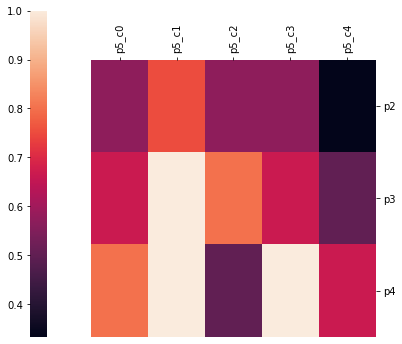

In [9]:
# Visualize the matrix of matches.
tbc_object.visualizeMatrixOfMatches(figsize = (8, 6), save_to_file = "matrix_of_matches.png")